In [1]:
import quandl
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')


In [2]:
api_key = open('QuandlApiKey','r').read()

In [3]:
def state_list():
    fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
    return fiddy_states[0][0][1:]

In [4]:
def grab_initial_state_data():
    states = state_list()
    main_df = pd.DataFrame()
    
    for abbv in states:
        query = 'FMAC/HPI_'+str(abbv)
        df = quandl.get(query, authtoken=api_key)
        df.rename(columns={'Value':str(abbv)}, inplace=True)
        df[abbv] = (df[abbv]-df[abbv][0]) / df[abbv][0] * 100.0
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df)
        main_df.to_pickle('HPI_data.pickle')
#grab_initial_state_data()            

In [5]:
def HPI_Benchmark():
    df = quandl.get('FMAC/HPI_USA', authtoken=api_key)
    df.rename(columns={'Value':'USA'}, inplace=True)
    df['USA'] = (df['USA'] - df['USA'][0]) / df['USA'][0] * 100.0
    print(df.head())

In [6]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))
HPI_data = pd.read_pickle('HPI_data.pickle')
HPI_State_Correlation = HPI_data.corr()
print(HPI_State_Correlation.head())

          AL        AK        AZ        AR        CA        CO        CT  \
AL  1.000000  0.948824  0.939822  0.995250  0.943692  0.959712  0.951918   
AK  0.948824  1.000000  0.915354  0.969565  0.926211  0.959024  0.883156   
AZ  0.939822  0.915354  1.000000  0.939061  0.978110  0.922154  0.914206   
AR  0.995250  0.969565  0.939061  1.000000  0.947417  0.971687  0.942742   
CA  0.943692  0.926211  0.978110  0.947417  1.000000  0.941640  0.936078   

          DE        FL        GA    ...           SD        TN        TX  \
AL  0.983003  0.932014  0.978835    ...     0.975839  0.992922  0.935667   
AK  0.938496  0.906711  0.905903    ...     0.976176  0.960667  0.976370   
AZ  0.948415  0.994704  0.952002    ...     0.912693  0.936337  0.900935   
AR  0.977692  0.931161  0.969702    ...     0.986480  0.994539  0.956985   
CA  0.965332  0.986812  0.954412    ...     0.935287  0.949201  0.922076   

          UT        VT        VA        WA        WV        WI        WY  
AL  0.97773

Date
1975-12-31     3.977786
1976-12-31    11.427667
1977-12-31    22.553793
1978-12-31    40.725884
1979-12-31    63.347802
Freq: A-DEC, Name: TX, dtype: float64


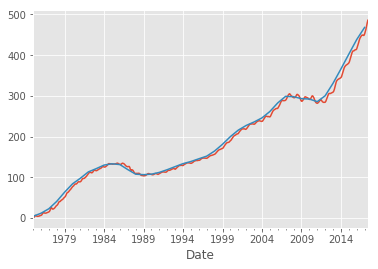

In [7]:
TX1yr = HPI_data['TX'].resample('A').mean()
print(TX1yr.head())
HPI_data['TX'].plot(label='Monthly TX HPI')
TX1yr.plot(label='Yearly TX HPI')
plt.legend().remove()
plt.show()

                  TX  TX1yr
Date                       
1975-01-31  0.000000    NaN
1975-02-28  1.018284    NaN
1975-03-31  2.821144    NaN
1975-04-30  5.433889    NaN
1975-05-31  6.207614    NaN
                  TX  TX1yr
Date                       
1975-01-31  0.000000    NaN
1975-02-28  1.018284    NaN
1975-03-31  2.821144    NaN
1975-04-30  5.433889    NaN
1975-05-31  6.207614    NaN


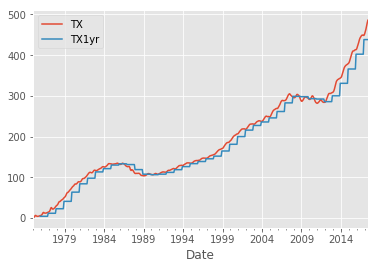

In [8]:
# Deal with the missing data

HPI_data['TX1yr'] = TX1yr
print(HPI_data[['TX', 'TX1yr']].head())
#HPI_data.dropna(inplace=True)
HPI_data.fillna(method='ffill', inplace=True)
print(HPI_data[['TX', 'TX1yr']].head())
HPI_data[['TX', 'TX1yr']].plot()
plt.show()

185.2221045819241
                    TX       TX1yr      TX12MA    TX12STD  TXcorrAK
Date                                                               
2017-02-28  457.354411  438.322582  444.435034   9.038871 -0.357682
2017-03-31  463.453245  438.322582  447.575021   8.495104 -0.418444
2017-04-30  471.463191  438.322582  450.943868   9.316577 -0.015457
2017-05-31  479.289322  438.322582  454.442044  11.384012  0.513015
2017-06-30  485.865246  438.322582  458.105939  13.799015  0.825369


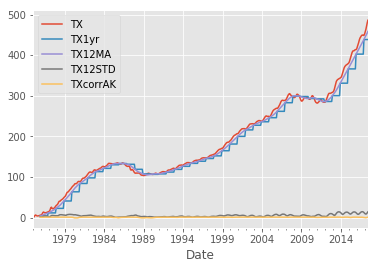

In [24]:
# rolling statistics

#HPI_data['TX12MA'] = pd.rolling_mean(HPI_data['TX'], 12)
HPI_data['TX12MA'] = HPI_data['TX'].rolling(window=12,center=False).mean()
HPI_data['TX12STD'] = HPI_data['TX'].rolling(window=12,center=False).std()
HPI_data['TXcorrAK'] = HPI_data['TX'].rolling(window=12,center=False).corr(HPI_data['AK'])
print(HPI_data['TX'].mean())
print(HPI_data[['TX', 'TX1yr', 'TX12MA', 'TX12STD', 'TXcorrAK']].tail())

HPI_data[['TX', 'TX1yr', 'TX12MA', 'TX12STD', 'TXcorrAK']].plot()
plt.show()
